In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("/home/vmeshchaninov/DiffusionTextGeneration-cond-ca/")

In [15]:
from datasets import load_from_disk, Dataset
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import numpy as np

In [4]:
dt = load_from_disk("/home/vmeshchaninov/nlp_models/data/common_gen/train")

In [7]:
from data.dataset import CommonGenDatasetDDP

In [9]:
dt = next(CommonGenDatasetDDP(split="train", base_path="/home/vmeshchaninov/nlp_models/data/common_gen").get_data())

Dataset tokenization (num_proc=30):   0%|          | 0/67389 [00:00<?, ? examples/s]

In [10]:
dt

Dataset({
    features: ['concept_set_idx', 'target', 'text_src', 'text_trg'],
    num_rows: 67389
})

In [13]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [14]:
prompt_lens = []
dif_lens = []

In [29]:
def get_lens(batch):
    mask = tokenizer(
        batch["text_src"],
        padding=True,
    )["attention_mask"]
    lens_src = np.sum(mask, axis=1)
    mask = tokenizer(
        batch["text_trg"],
        padding=True,
    )["attention_mask"]
    lens_trg = np.sum(mask, axis=1)
    return {
        "lens_src": lens_src,
        "lens_trg": lens_trg
    }

In [31]:
dt_p = dt.map(
    get_lens,
    batch_size=1000,
    batched=True
)

Map:   0%|          | 0/67389 [00:00<?, ? examples/s]

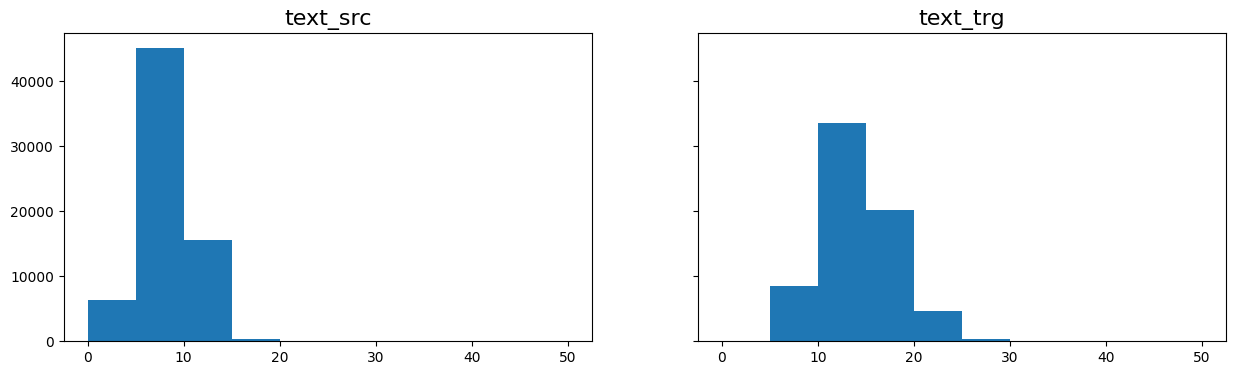

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)

range = (0, 50)
bins = 10

axs[0].hist(dt_p["lens_src"], range=range, bins=bins)
axs[0].set_title("text_src", fontsize=16)

axs[1].hist(dt_p["lens_trg"], range=range, bins=bins)
axs[1].set_title("text_trg", fontsize=16)

plt.show()

In [35]:
np.max(dt_p["lens_src"])

20